# APIs


##¿Qué es una API?
Las API son mecanismos que permiten a dos componentes de software comunicarse entre sí mediante un conjunto de definiciones y protocolos. Por ejemplo, el sistema de software del instituto de meteorología contiene datos meteorológicos diarios. La aplicación meteorológica de su teléfono “habla” con este sistema a través de las API y le muestra las actualizaciones meteorológicas diarias en su teléfono.

API significa “interfaz de programación de aplicaciones”. En el contexto de las API, la palabra aplicación se refiere a cualquier software con una función distinta. La interfaz puede considerarse como un contrato de servicio entre dos aplicaciones. Este contrato define cómo se comunican entre sí mediante solicitudes y respuestas. La documentación de su API contiene información sobre cómo los desarrolladores deben estructurar esas solicitudes y respuestas.


## Tipos de API
1. **API de SOAP**: Estas API utilizan el protocolo simple de acceso a objetos. El cliente y el servidor intercambian mensajes mediante XML. Se trata de una API menos flexible que era más popular en el pasado.
2. **API de RPC**: Estas API se denominan llamadas a procedimientos remotos. El cliente completa una función (o procedimiento) en el servidor, y el servidor devuelve el resultado al cliente.
3. **API de WebSocket**: La API de WebSocket es otro desarrollo moderno de la API web que utiliza objetos JSON para pasar datos. La API de WebSocket admite la comunicación bidireccional entre las aplicaciones cliente y el servidor. El servidor puede enviar mensajes de devolución de llamada a los clientes conectados, por lo que es más eficiente que la API de REST.
4. **API de REST**: Estas son las API más populares y flexibles que se encuentran en la web actualmente. El cliente envía las solicitudes al servidor como datos. El servidor utiliza esta entrada del cliente para iniciar funciones internas y devuelve los datos de salida al cliente. Veamos las API de REST con más detalle a continuación.

Leer [más](https://aws.amazon.com/es/what-is/api/)

## API de Twitter
Tomado de [Twitter](https://help.twitter.com/es/rules-and-policies/twitter-api)

1. Twitter es lo qué está pasando en el mundo y sobre lo que las personas están hablando en este momento. Puedes acceder a Twitter en la Web o desde tu dispositivo móvil. Para compartir información en Twitter de la forma más amplia posible, también les proporcionamos a las empresas, los desarrolladores y los usuarios acceso programático a los datos de Twitter mediante nuestras API (interfaces de programación de aplicaciones).

2. Los datos de Twitter son únicos y se extraen a partir de datos de la mayoría de las otras plataformas sociales porque reflejan información que los usuarios deciden compartir de forma pública. Nuestra plataforma de API ofrece acceso amplio a los datos de Twitter que los usuarios han decidido compartir con el mundo.



### Tipos de datos en twitter

1. **Cuentas y usuarios**: Les permitimos a los desarrolladores administrar de forma programática el perfil y la configuración de una cuenta, silenciar o bloquear usuarios, administrar usuarios y seguidores, solicitar información sobre actividad de una cuenta autorizada y mucho más.

2. **Tweets y respuestas**: Los Tweets y las respuestas públicas están a disposición de los desarrolladores, y les permitimos publicar Tweets a través de nuestra API. Los desarrolladores pueden acceder a los Tweets al buscar palabras clave específicas o solicitar una muestra de Tweets de cuentas específicas. 

3. **Mensajes Directos**: Nuestros puntos de conexión de Mensajes directos brindan acceso a las conversaciones por DM de usuarios que han otorgado permiso de forma explícita a una aplicación específica. No vendemos Mensajes Directos. Nuestras API de DM proporcionan acceso limitado a desarrolladores para crear experiencias personalizadas en Twitter

In [ ]:
import tweepy
 
import pandas as pd
import numpy as np
import csv
import re 
import string
import csv
import gensim

### parámetros

Vamos [acá](https://developer.twitter.com/en/portal/apps/17823883/settings)

1. Debemos revisar los Tokens y demás, [leer](https://developer.twitter.com/en/portal/apps/17823883/keys)

2. Son mis [tokens](https://developer.twitter.com/en/portal/dashboard), cuidado con ellos

In [ ]:
Token = "990969862272020482-dDD6jvdMCHVt35uO8crL5FDbMEHu5Em"
Secret_Token = "u8RsBpHnQheePgx28eD47bDp4xKaT5qqCkgHtkSWrFkJB"
bearer_token ="AAAAAAAAAAAAAAAAAAAAAIv4DwEAAAAAJ%2FC6oO5EBJXLa2EsM%2BiYqrP4Vwc%3Dp36gNfmxiU9M1nb84i7rrCbazJgjdLs1WpJVjppriNoI9YH4fg"
api_key ="4kCP9o0cpVlhyc324j8mvluOn"
api_key_secret ="YrxSml9Qw0SzZ1FKSrmt3UFp4t3NpNduV6LWYw70o20bUTcLmf"

Para que la API funcione, es necesario tener estos parámetros

1. consumer_key
2. consumer_secret
3. access_key
4. access_secret
 

In [ ]:
consumer_key = api_key
consumer_secret = api_key_secret
access_key= Token
access_secret = Secret_Token

## Conectar la API

1. Usamos la función [OAuthHandler](https://docs.tweepy.org/en/v3.5.0/auth_tutorial.html) para dar nuestros codigos de consumidor

2. Usamos la función [set_access_token](https://python.hotexamples.com/examples/tweepy/OAuthHandler/set_access_token/python-oauthhandler-set_access_token-method-examples.html) para dar nuestros codigos de acceso

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

### Invocamos la API 

Con la función [API](https://docs.tweepy.org/en/stable/api.html)


In [ ]:
api = tweepy.API(auth,wait_on_rate_limit=True)

## Vamos a la busqueda

1. Definimos la palabra clave para buscar (o el string)
2. Filtrar [" -filter:retweets"] permite eliminar los re-tweets

In [ ]:
search_words = "Millonarios"      #enter your words
new_search = search_words + " -filter:retweets"

### Guardar el CSV

1. Es mejor guardar los tweets en un formato plano, cómo [csv](https://www.codingem.com/python-write-to-csv-file/)
2.Antes de todo, vamos por un ejemplo de escribir en csv
3. La función open en Python, [¿cómo funciona?](https://www.w3schools.com/python/ref_func_open.asp)

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
import csv

data = ["This", "is", "a", "Test"]

with open('example.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(data)

¿Qué realiza el siguiente código?

In [ ]:
csvFile = open('/content/Twitter.csv', 'a')
csvWriter = csv.writer(csvFile)

## Vamos a correr la API

1. Leer [esto](https://patricrp.medium.com/buscando-contenido-con-la-api-de-twitter-f3c12994a77f)

2. Leer tambien [esto](https://docs.tweepy.org/en/v3.5.0/cursor_tutorial.html)

3. Cuando se realiza una petición a la API de Twitter se utiliza con frecuencia la paginación, que ayuda a organizar la información que devuelve Twitter: usuarios, tweets, timeline, etc. Cursor es un objeto que facilita esta paginación, en recursos y en organización de la información. Cursor organiza esta información en ítems o páginas. Indica si prefieres que devuelva uno u otro:

In [ ]:
for tweet in tweepy.Cursor(api.search,q=new_search,count=1000,
                           lang="es",
                           since_id=0).items(1000):
   csvWriter.writerow([tweet.created_at, tweet.text,tweet.user.screen_name, tweet.user.location])

## Trampa de Pandas :)

Convertiré el csv a Pandas Dataframe para _verlo más lindo_

In [ ]:
datos = pd.read_csv('/content/Twitter.csv', header=None)
datos

,0,1,2,3
0,2022-10-03 15:37:53,@BtcAndres El gran SCAM de los artistas 🤣\nY s...,Frbaute17,NaN
1,2022-10-03 15:37:44,@jramospadilla Ladrones!!! Chorros ! millonari...,VelezBarrios,NaN
2,2022-10-03 15:37:16,"Después de regalar 900M a los millonarios, men...",CComesto,Detrás de ti
3,2022-10-03 15:36:29,Millonarios días. No viene al caso pero quería...,TheReaIJohn,New York | Bern | Worldwide
4,2022-10-03 15:35:33,Somos millonarios 🔥🔥🔥🔥 https://t.co/WL6JZxUHfK,Zori_Lucero1,Santo Domingo
...,...,...,...,...
990,2022-10-03 04:25:14,@SergioChouza @LulaOficial @CFKArgentina El pr...,pedroplatense4,Ciudad de La Plata
991,2022-10-03 04:23:37,⭐️ El poder de la persistencia. Estas personas...,_newspaperboys_,España
992,2022-10-03 04:23:32,@danielyovera Y eso que la gente sabe que se r...,RvShihiro,NaN
993,2022-10-03 04:22:59,@robdnavarro Te olvidaste del prontuario crimi...,EugenioBravo10,NaN


In [ ]:
datos.columns=["Fecha", "Tweet", "Usuario", "Lugar"]
datos

,Fecha,Tweet,Usuario,Lugar
0,2022-10-03 15:37:53,@BtcAndres El gran SCAM de los artistas 🤣\nY s...,Frbaute17,NaN
1,2022-10-03 15:37:44,@jramospadilla Ladrones!!! Chorros ! millonari...,VelezBarrios,NaN
2,2022-10-03 15:37:16,"Después de regalar 900M a los millonarios, men...",CComesto,Detrás de ti
3,2022-10-03 15:36:29,Millonarios días. No viene al caso pero quería...,TheReaIJohn,New York | Bern | Worldwide
4,2022-10-03 15:35:33,Somos millonarios 🔥🔥🔥🔥 https://t.co/WL6JZxUHfK,Zori_Lucero1,Santo Domingo
...,...,...,...,...
990,2022-10-03 04:25:14,@SergioChouza @LulaOficial @CFKArgentina El pr...,pedroplatense4,Ciudad de La Plata
991,2022-10-03 04:23:37,⭐️ El poder de la persistencia. Estas personas...,_newspaperboys_,España
992,2022-10-03 04:23:32,@danielyovera Y eso que la gente sabe que se r...,RvShihiro,NaN
993,2022-10-03 04:22:59,@robdnavarro Te olvidaste del prontuario crimi...,EugenioBravo10,NaN


In [ ]:
datos.loc[3000,"Tweet"]

'@iamdamaged8 Pues era una de las opciones de mi luna de miel y la descarté y ahora aún más'

In [ ]:
datos.Tweet

0      @BtcAndres El gran SCAM de los artistas 🤣\nY s...
1      @jramospadilla Ladrones!!! Chorros ! millonari...
2      Después de regalar 900M a los millonarios, men...
3      Millonarios días. No viene al caso pero quería...
4         Somos millonarios 🔥🔥🔥🔥 https://t.co/WL6JZxUHfK
                             ...                        
990    @SergioChouza @LulaOficial @CFKArgentina El pr...
991    ⭐️ El poder de la persistencia. Estas personas...
992    @danielyovera Y eso que la gente sabe que se r...
993    @robdnavarro Te olvidaste del prontuario crimi...
994    @marianagc El Neoliberalismo,hace millonarios ...
Name: Tweet, Length: 995, dtype: object

## Hagamos una Nube de palabras

1. para empezar a _trillar_ cositas con Python, de acá en adelante es cómo _limpiar_ textos

2. Basado en esta [página](https://datascientest.com/es/como-generar-un-wordcloud-con-python) y en está otra [qué es de lectura obligatoría](https://datapeaker.com/big-data/nube-de-palabras-en-python-como-construir-word-cloud-en-python/)

3. Vamos ir usando librerias, la documentación de [WordCloud](https://amueller.github.io/word_cloud/)

In [ ]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


## Código básico de Nube de palabras

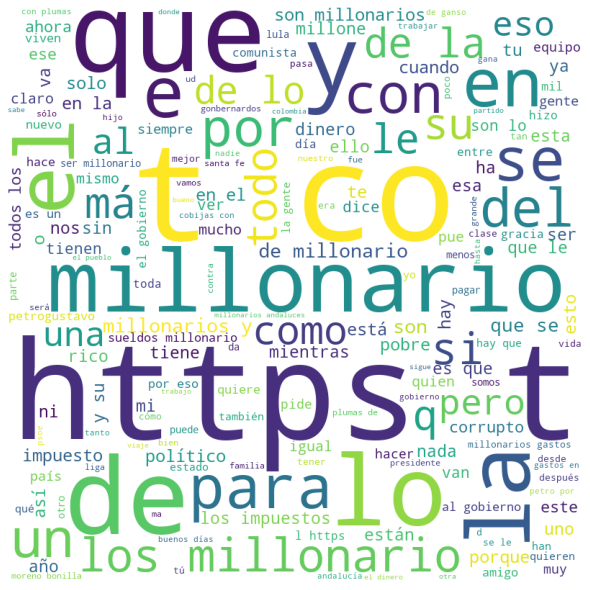

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in datos.Tweet:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

1. Esta nube de palabras no dice nada
2. Tiene muchas palabras [vacias](https://www.yoseomarketing.com/blog/stop-words-en-espanol-lista-definitiva/)

### Que problema el español

1. Los siguientes códigos se adaptaron de [acá](https://medium.com/codex/making-wordcloud-of-tweets-using-python-ca114b7a4ef4)
2. La libreria [NLTK](https://www.nltk.org/)

3. BeautifulSoup es para obtener cosillas de [HTML](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, WordPunctTokenizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
token = WordPunctTokenizer()

1. Cargamos las palabras vacias del español

In [ ]:
nltk.download('stopwords')
stops = set(stopwords.words('spanish'))
stops

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

### Eliminamos cosas de ruido

1. Emoticones
2. Simbolos
3. Otros diagramas 
4. Banderitas

Usamos en todos expresiones [regulares](https://www.w3schools.com/python/python_regex.asp) 

In [ ]:
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

In [ ]:
datos["Tweet"][990]

'@SergioChouza @LulaOficial @CFKArgentina El proyecto sería más pobreza, hambre y miseria para el pueblo.  \nMientras… https://t.co/d3Cw554eAr'

In [ ]:
match = re.sub(regex_pattern,'',datos["Tweet"][15004]) #replaces pattern with ''
print(match)

☀️ La NASA encuentra una nave espacial perdida orbitando la Luna... https://t.co/6cCdRH8yys


### Quito las URLS de los tweets

In [ ]:
datos["Tweet"][990]

'@SergioChouza @LulaOficial @CFKArgentina El proyecto sería más pobreza, hambre y miseria para el pueblo.  \nMientras… https://t.co/d3Cw554eAr'

In [ ]:
pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
match = re.sub(pattern,'',datos["Tweet"][990])
print(match)

@SergioChouza @LulaOficial @CFKArgentina El proyecto sería más pobreza, hambre y miseria para el pueblo.  
Mientras… 


## Quito todo los @

In [ ]:
datos["Tweet"][990]

'@SergioChouza @LulaOficial @CFKArgentina El proyecto sería más pobreza, hambre y miseria para el pueblo.  \nMientras… https://t.co/d3Cw554eAr'

In [ ]:
re_list = ['@[A-Za-z0–9_]+', '#']
combined_re = re.compile( '|'.join( re_list) )
match = re.sub(combined_re,'',datos["Tweet"][990])
print(match)

   El proyecto sería más pobreza, hambre y miseria para el pueblo.  
Mientras… https://t.co/d3Cw554eAr


## Elimina los códigos HTML

Los códigos HTML son pasados a texto

In [ ]:
del_amp = BeautifulSoup(datos["Tweet"][990], 'lxml')
del_amp_text = del_amp.get_text()
print(del_amp_text)

@SergioChouza @LulaOficial @CFKArgentina El proyecto sería más pobreza, hambre y miseria para el pueblo.  
Mientras… https://t.co/d3Cw554eAr


## Creo una función 

1. Cómo son varios pasos, creo la función que los hace todos
2. ¿Qué es una función?


In [ ]:
def cleaning_tweets(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_https = re.sub(pattern,'',del_link_mentions)
    del_emoticons = re.sub(regex_pattern, '', del_https )
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

## Se la aplico a todos los tweets 


In [ ]:
cleaned_tweets = []
for i in range(0,datos.shape[0]):                                                                 
    cleaned_tweets.append(cleaning_tweets((datos.Tweet[i])))

In [ ]:
cleaned_tweets

['gran scam los artistas sus seguidores creyendo que harán millonarios ...',
 'ladrones !!! chorros millonarios costa del pueblo',
 'después regalar 900m los millonarios mendiga porque tienen sed "... paso del españa nos roba "..…',
 'millonarios días viene caso pero quería decirte que los equipos gamero desinflan finales',
 'somos millonarios',
 'vean mentalidad este pobre porro ignorante defendiendo falso socialismo lópez mientras',
 'que comentario más ridículo ... hay quienes son millonarios pero fajan trab',
 '110973 11s 25050086',
 'dinero hay muchos millones perros que viven los impuestos solo los millonarios',
 'ahira suben famosa fichita todos somos casi millonarios habitando país seguro',
 'política una nueva polémica crece alrededor del gobierno gustavo petro luego que abogado daniel briceñ',
 'brutos esos hubieran esperado black friday para comprar todos esos plumones millonarios plumongate',
 'ratas ladronas viviendo como millonarios con plata del pueblo',
 'los únicos due

1. Los vuelvo un string

In [ ]:
string = pd.Series(cleaned_tweets).str.cat(sep=' ')
string

'gran scam los artistas sus seguidores creyendo que harán millonarios ... ladrones !!! chorros millonarios costa del pueblo después regalar 900m los millonarios mendiga porque tienen sed "... paso del españa nos roba "..… millonarios días viene caso pero quería decirte que los equipos gamero desinflan finales somos millonarios vean mentalidad este pobre porro ignorante defendiendo falso socialismo lópez mientras que comentario más ridículo ... hay quienes son millonarios pero fajan trab 110973 11s 25050086 dinero hay muchos millones perros que viven los impuestos solo los millonarios ahira suben famosa fichita todos somos casi millonarios habitando país seguro política una nueva polémica crece alrededor del gobierno gustavo petro luego que abogado daniel briceñ brutos esos hubieran esperado black friday para comprar todos esos plumones millonarios plumongate ratas ladronas viviendo como millonarios con plata del pueblo los únicos dueños del perú son esa clase política tradicional llama

### Realizo el WorldCloud

1. Importante las palabras vacias

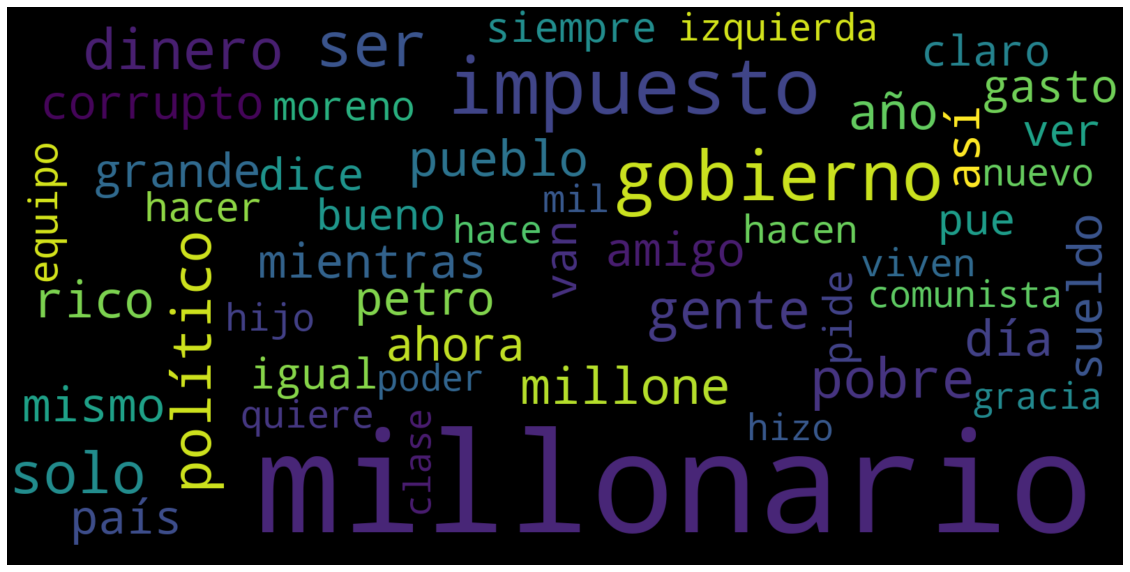

In [ ]:
wordcloud = WordCloud(width=1600, stopwords=stops,height=800,max_font_size=200,
                      max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
stops.update(["millonario", "millonarios", "luna"])
stops

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

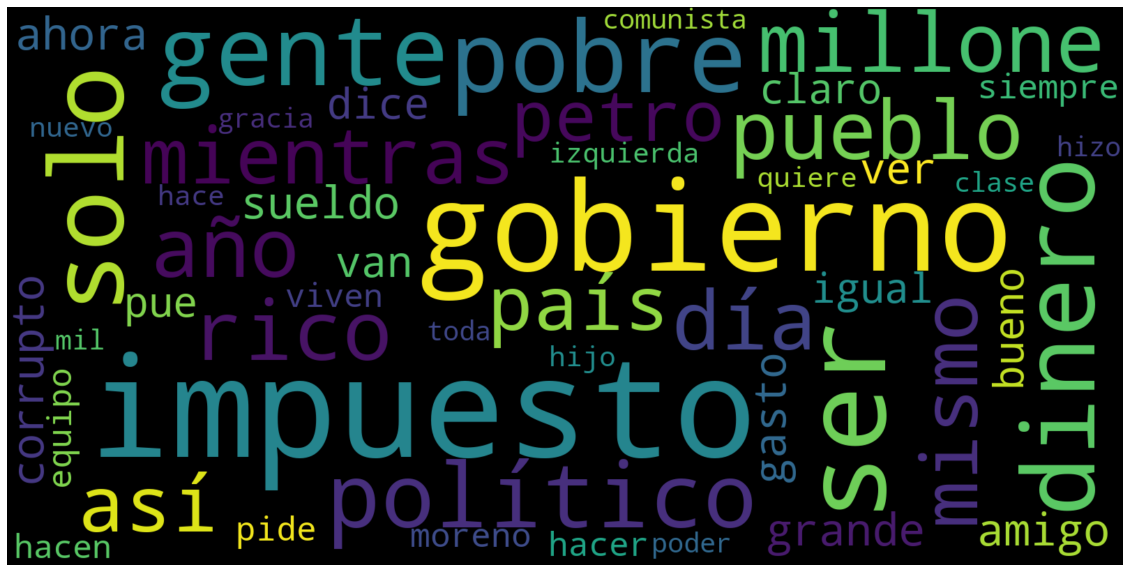

In [ ]:
wordcloud = WordCloud(width=1600, stopwords=stops,height=800,max_font_size=200,
                      max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Analisis de sentimientos

1. Basado en [acá](https://www.linkedin.com/pulse/an%C3%A1lisis-de-sentimiento-o-polaridad-texto-en-espa%C3%B1ol-con-pablo-moreno/?trk=pulse-article_more-articles_related-content-card&originalSubdomain=es)
2. ¿Qué es un sentimiento?

In [ ]:
!pip install sentiment_analysis_spanish

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 30.0 MB 67.3 MB/s 


In [ ]:
from sentiment_analysis_spanish import sentiment_analysis
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [ ]:
datos['puntaje'] = datos['Tweet'].apply(lambda x: sentiment.sentiment(x))

In [ ]:
datos['puntaje'] = np.round(datos['puntaje'], 4)
datos["cleaned_tweets"] = cleaned_tweets
datos 

,Fecha,Tweet,Usuario,Lugar,puntaje,cleaned_tweets
0,2022-10-03 15:37:53,@BtcAndres El gran SCAM de los artistas 🤣\nY s...,Frbaute17,NaN,0.0928,gran scam los artistas sus seguidores creyendo...
1,2022-10-03 15:37:44,@jramospadilla Ladrones!!! Chorros ! millonari...,VelezBarrios,NaN,0.3313,ladrones !!! chorros millonarios costa del pueblo
2,2022-10-03 15:37:16,"Después de regalar 900M a los millonarios, men...",CComesto,Detrás de ti,0.0385,después regalar 900m los millonarios mendiga p...
3,2022-10-03 15:36:29,Millonarios días. No viene al caso pero quería...,TheReaIJohn,New York | Bern | Worldwide,0.0002,millonarios días viene caso pero quería decirt...
4,2022-10-03 15:35:33,Somos millonarios 🔥🔥🔥🔥 https://t.co/WL6JZxUHfK,Zori_Lucero1,Santo Domingo,0.2166,somos millonarios
...,...,...,...,...,...,...
990,2022-10-03 04:25:14,@SergioChouza @LulaOficial @CFKArgentina El pr...,pedroplatense4,Ciudad de La Plata,0.0126,proyecto sería más pobreza hambre miseria para...
991,2022-10-03 04:23:37,⭐️ El poder de la persistencia. Estas personas...,_newspaperboys_,España,0.0006,poder persistencia estas personas nunca dejaro...
992,2022-10-03 04:23:32,@danielyovera Y eso que la gente sabe que se r...,RvShihiro,NaN,0.0000,eso que gente sabe que robo casi millones paga...
993,2022-10-03 04:22:59,@robdnavarro Te olvidaste del prontuario crimi...,EugenioBravo10,NaN,0.0031,olvidaste del prontuario criminal que está lim...


In [ ]:
list(datos[datos["puntaje"]>0.9]["Tweet"])

['Millonarios sin duda es un gran equipo, tiene muchas cualidades que se han nombrado, lleva una racha de tres partid… https://t.co/tdlLCAxemz',
 '@IdiazAyuso Mentira; en Madrid el dinero recaudado va a parar a los bolsillos de amigotes, familiares y amigos, a t… https://t.co/dzhU8ym72m',
 'un parcerito, en un bus, yendo a ver a Millonarios a otra ciudad. je. https://t.co/e2HTdzhaYw',
 '@joseantoniokast En ningún caso miente Daniel Matamala, , una constitución hecha  al pie de la letra para q los mil… https://t.co/0OPWCER2Ed',
 '@IdiazAyuso Madrid comunidad de millonarios o las clases medias y trabajadoras están con las bocas cerradas ?',
 '@DebatAlRojoVivo #Madrid, un paraíso fiscal para millonarios.',
 '@IvanCepedaCast Feria de televisores en el gobierno Petro, en @EMCALIoficial y Palacio de Nariño compran televisores millonarios',
 '@crizremixed @Agenda2030_ Sin duda viviría muy bien en esos países, hay infraestructura pasa que millonarios se la pasan muy bien']

## Una nube solo con sentimientos muy positivos


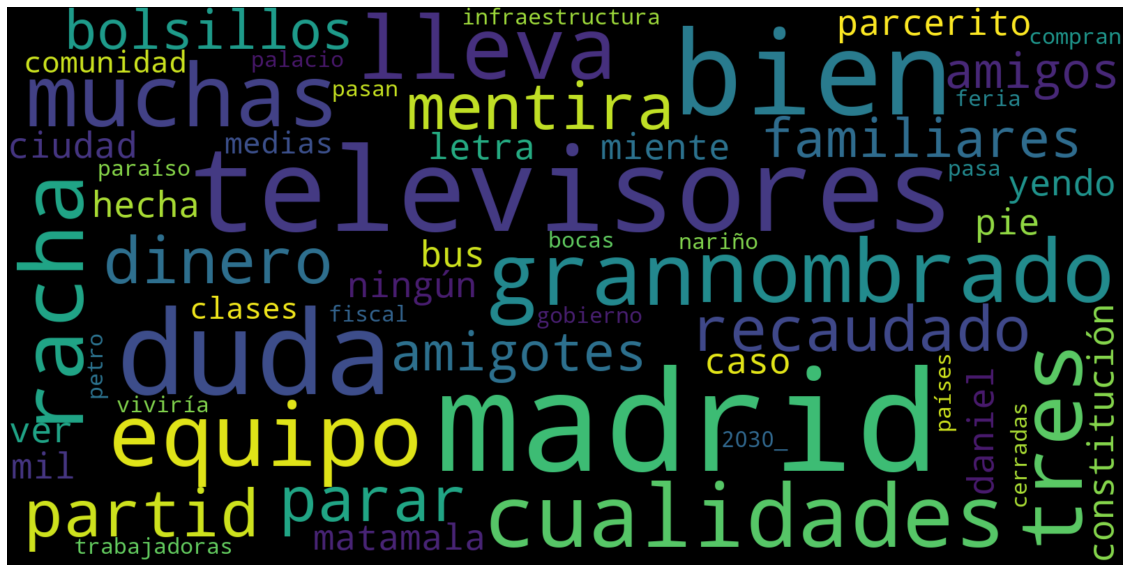

In [ ]:
positivo = datos[datos["puntaje"]>0.9]
cleaned_tweets = []
for i in positivo.index:                                                                 
    cleaned_tweets.append(cleaning_tweets(positivo.Tweet[i]))

string = pd.Series(cleaned_tweets).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, stopwords=stops,height=800,max_font_size=200,
                      max_words=100,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

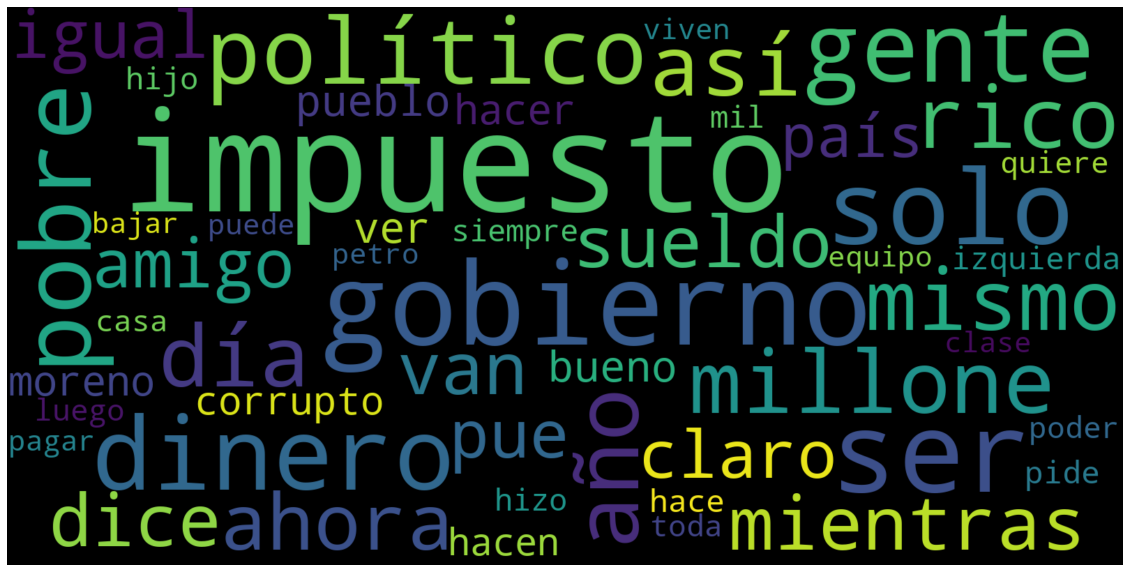

In [ ]:
positivo = datos[datos["puntaje"]<0.2]
cleaned_tweets = []
for i in positivo.index:                                                                 
    cleaned_tweets.append(cleaning_tweets(positivo.Tweet[i]))

string = pd.Series(cleaned_tweets).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, stopwords=stops,height=800,max_font_size=200,
                      max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## API de Google Maps

Tarea es usar la API de Google
1. [Leer](https://maplink.global/blog/es/como-obtener-google-maps-api-key/)